# 🥑 ANÁLISIS Y LIMPIEZA DE DATOS - AGUACATES
**Analista:** Grupo 8  
**Fecha:** 2026-02-15  
**Objetivo:** Preparar dataset de ventas de aguacates para análisis de tendencias de precio y volumen por región

---

## 📋 Índice
1. Carga de datos y configuración
2. Exploración inicial (EDA)
3. Limpieza estructural
4. Validaciones de integridad de negocio
5. Manejo de duplicados
6. Detección de outliers
7. Filtrado de regiones especiales
8. Feature engineering
9. Validación final y exportación

---

## 1️⃣ CARGA DE DATOS Y CONFIGURACIÓN

In [1]:
# Librerías estándar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Configuración de visualización
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Warnings
import warnings
warnings.filterwarnings('ignore')

print("Librerías cargadas correctamente")


Librerías cargadas correctamente


In [2]:
# Cargar datos
data = pd.read_csv("dataset_avocado.csv")

# Datos originales backup 
df_original = data.copy()

print(f"Datos cargados: {data.shape[0]:,} filas × {data.shape[1]} columnas")
print(f"Backup creado: {df_original.shape}")

Datos cargados: 18,249 filas × 14 columnas
Backup creado: (18249, 14)


## 2️⃣ EXPLORACIÓN INICIAL (EDA)
**Objetivo:** Entender QUÉ tenemos antes de limpiar

In [3]:
# 2.1 Información general
print("INFORMACIÓN GENERAL DEL DATASET")
data.info()

INFORMACIÓN GENERAL DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [4]:
# 2.2 Primeras y últimas filas
print(" PRIMERAS 5 FILAS:")
display(data.head())

print("\n ÚLTIMAS 5 FILAS:")
display(data.tail())

 PRIMERAS 5 FILAS:


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany



 ÚLTIMAS 5 FILAS:


,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
# 2.3 Estadísticas descriptivas
print("ESTADÍSTICAS NUMÉRICAS:")
display(data.describe().T)

print("\nESTADÍSTICAS CATEGÓRICAS:")
display(data.describe(include='object').T)

ESTADÍSTICAS NUMÉRICAS:


,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,24.232232,1.548104e+01,0.00,10.00,24.00,38.00,52.00
AveragePrice,18249.0,1.405978,4.026766e-01,0.44,1.10,1.37,1.66,3.25
Total Volume,18249.0,850644.013009,3.453545e+06,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,293008.424531,1.264989e+06,0.00,854.07,8645.30,111020.20,22743616.17
4225,18249.0,295154.568356,1.204120e+06,0.00,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,22839.735993,1.074641e+05,0.00,0.00,184.99,6243.42,2546439.11
Total Bags,18249.0,239639.202060,9.862424e+05,0.00,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,182194.686696,7.461785e+05,0.00,2849.42,26362.82,83337.67,13384586.80
Large Bags,18249.0,54338.088145,2.439660e+05,0.00,127.47,2647.71,22029.25,5719096.61
XLarge Bags,18249.0,3106.426507,1.769289e+04,0.00,0.00,0.00,132.50,551693.65



ESTADÍSTICAS CATEGÓRICAS:


,count,unique,top,freq
Date,18249,169,2015-12-27,108
type,18249,2,conventional,9126
region,18249,54,Albany,338


In [6]:
# 2.4 Valores nulos
print("VALORES NULOS POR COLUMNA:")
nulos = pd.DataFrame({
    'Nulos': data.isnull().sum(),
    'Porcentaje': (data.isnull().sum() / len(data) * 100).round(2)
})
nulos = nulos[nulos['Nulos'] > 0].sort_values('Nulos', ascending=False)

if len(nulos) > 0:
    display(nulos)
else:
    print("No hay valores nulos")

VALORES NULOS POR COLUMNA:
No hay valores nulos


In [7]:
# 2.5 Análisis de variables categóricas
print("VALORES ÚNICOS EN CATEGÓRICAS:")
print(f"Tipos de producto: {data['type'].unique()}")
print(f"Cantidad: {data['type'].nunique()}")
print(f"\nDistribución:")
print(data['type'].value_counts())

print(f"\n{'='*80}")
print(f"\nREGIONES ({data['region'].nunique()} únicas):")
print(data['region'].value_counts())

print(f"\n{'='*80}")
print(f"\nAÑOS: {sorted(data['year'].unique())}")

VALORES ÚNICOS EN CATEGÓRICAS:
Tipos de producto: ['conventional' 'organic']
Cantidad: 2

Distribución:
type
conventional    9126
organic         9123
Name: count, dtype: int64


REGIONES (54 únicas):
region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast

In [8]:
# 2.7 Análisis de fechas (aunque esté como string)
print("📅 ANÁLISIS DE FECHAS:")
print(f"Fecha mínima (string): {data['Date'].min()}")
print(f"Fecha máxima (string): {data['Date'].max()}")
print(f"Total de fechas únicas: {data['Date'].nunique()}")

📅 ANÁLISIS DE FECHAS:
Fecha mínima (string): 2015-01-04
Fecha máxima (string): 2018-03-25
Total de fechas únicas: 169


## 3️⃣ LIMPIEZA ESTRUCTURAL
**Objetivo:** Arreglar estructura (nombres, tipos de datos)

In [9]:
# 3.1 Eliminar columna 'Unnamed: 0' (es solo índice redundante)
print("ELIMINANDO COLUMNA REDUNDANTE...")
print(f"Antes: {data.columns.tolist()}")

if 'Unnamed: 0' in data.columns:
    data = data.drop(columns=['Unnamed: 0'])
    print("Columna 'Unnamed: 0' eliminada")

print(f"Después: {data.columns.tolist()}")

ELIMINANDO COLUMNA REDUNDANTE...
Antes: ['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
Columna 'Unnamed: 0' eliminada
Después: ['Date', 'AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']


In [10]:
# 3.2 Renombrar columnas a español con nombres descriptivos
print("RENOMBRANDO COLUMNAS...")

columnas_espanol = {
    'Date': 'fecha',
    'AveragePrice': 'precio_promedio',
    'Total Volume': 'volumen_total',
    '4046': 'volumen_plu_4046',  # PLU = Price Look-Up code (código de búsqueda de precio)
    '4225': 'volumen_plu_4225',
    '4770': 'volumen_plu_4770',
    'Total Bags': 'bolsas_totales',
    'Small Bags': 'bolsas_pequenas',
    'Large Bags': 'bolsas_grandes',
    'XLarge Bags': 'bolsas_extra_grandes',
    'type': 'tipo_producto',
    'year': 'anio',
    'region': 'region'
}

data = data.rename(columns=columnas_espanol)

print("Columnas renombradas:")
for old, new in columnas_espanol.items():
    print(f"{old:<20} → {new}")

RENOMBRANDO COLUMNAS...
Columnas renombradas:
Date                 → fecha
AveragePrice         → precio_promedio
Total Volume         → volumen_total
4046                 → volumen_plu_4046
4225                 → volumen_plu_4225
4770                 → volumen_plu_4770
Total Bags           → bolsas_totales
Small Bags           → bolsas_pequenas
Large Bags           → bolsas_grandes
XLarge Bags          → bolsas_extra_grandes
type                 → tipo_producto
year                 → anio
region               → region


In [11]:
# 3.3 Convertir tipos de datos correctos
print("CONVIRTIENDO TIPOS DE DATOS...")

# Fecha a datetime
data['fecha'] = pd.to_datetime(data['fecha'])
print("fecha' convertida a datetime")

# Categóricas (optimiza memoria y habilita funciones especiales)
data['tipo_producto'] = data['tipo_producto'].astype('category')
data['region'] = data['region'].astype('category')
print("Variables categóricas convertidas")

# Verificar conversión
print("\nTIPOS DE DATOS ACTUALES:")
print(data.dtypes)

CONVIRTIENDO TIPOS DE DATOS...
fecha' convertida a datetime
Variables categóricas convertidas

TIPOS DE DATOS ACTUALES:
fecha                   datetime64[ns]
precio_promedio                float64
volumen_total                  float64
volumen_plu_4046               float64
volumen_plu_4225               float64
volumen_plu_4770               float64
bolsas_totales                 float64
bolsas_pequenas                float64
bolsas_grandes                 float64
bolsas_extra_grandes           float64
tipo_producto                 category
anio                             int64
region                        category
dtype: object


## 4️⃣ VALIDACIONES DE INTEGRIDAD DE NEGOCIO
**Objetivo:** Verificar que los números cuadren según la lógica del negocio

In [12]:
# 4.1 Validar coherencia de volúmenes
print("VALIDACIÓN: COHERENCIA DE VOLÚMENES")
print("Verificando: volumen_total ≈ (suma_plu + bolsas_totales)\n")

# Calcular suma de PLUs
data['suma_plu'] = (data['volumen_plu_4046'] + 
                     data['volumen_plu_4225'] + 
                     data['volumen_plu_4770'])

# Calcular volumen esperado
data['volumen_esperado'] = data['suma_plu'] + data['bolsas_totales']

# Calcular diferencia
data['diferencia_volumen'] = abs(data['volumen_total'] - data['volumen_esperado'])

# Tolerancia de 1% (por redondeos)
umbral = data['volumen_total'] * 0.01
problemas_volumen = data[data['diferencia_volumen'] > umbral]

print(f"Total de registros: {len(data):,}")
print(f"Registros con inconsistencia (>1%): {len(problemas_volumen):,}")
print(f"Porcentaje problemático: {len(problemas_volumen)/len(data)*100:.2f}%")

if len(problemas_volumen) > 0:
    print("\nEJEMPLOS DE INCONSISTENCIAS:")
    display(problemas_volumen[['fecha', 'region', 'volumen_total', 'volumen_esperado', 'diferencia_volumen']].head())
else:
    print("\nTodos los volúmenes son coherentes")

VALIDACIÓN: COHERENCIA DE VOLÚMENES
Verificando: volumen_total ≈ (suma_plu + bolsas_totales)

Total de registros: 18,249
Registros con inconsistencia (>1%): 4
Porcentaje problemático: 0.02%

EJEMPLOS DE INCONSISTENCIAS:


,fecha,region,volumen_total,volumen_esperado,diferencia_volumen
15433,2017-12-10,Detroit,13710.63,13537.85,172.78
15560,2017-07-16,GreatLakes,209543.04,205656.94,3886.10
15772,2017-07-16,Indianapolis,10838.58,9982.97,855.61
17832,2018-03-04,Indianapolis,10713.61,10471.21,242.40


## 5️⃣ MANEJO DE DUPLICADOS
**Objetivo:** Identificar y eliminar registros duplicados

In [13]:
# 5.1 Duplicados exactos
print("DUPLICADOS EXACTOS (todas las columnas idénticas)")

duplicados_exactos = data.duplicated().sum()
print(f"Total de duplicados exactos: {duplicados_exactos}")
print(f"Porcentaje: {duplicados_exactos/len(data)*100:.2f}%")

if duplicados_exactos > 0:
    print("EJEMPLOS DE DUPLICADOS:")
    display(data[data.duplicated(keep=False)].sort_values(['fecha', 'region']).head(10))
else:
    print("No hay duplicados exactos")

DUPLICADOS EXACTOS (todas las columnas idénticas)
Total de duplicados exactos: 0
Porcentaje: 0.00%
No hay duplicados exactos


In [14]:
# 5.2 Duplicados lógicos (misma llave de negocio)
print("DUPLICADOS LÓGICOS (fecha + región + tipo)")

# La llave única debería ser: fecha + region + tipo_producto
llave_negocio = ['fecha', 'region', 'tipo_producto']
duplicados_logicos = data.duplicated(subset=llave_negocio, keep=False)

print(f"Total de duplicados lógicos: {duplicados_logicos.sum()}")
print(f"Porcentaje: {duplicados_logicos.sum()/len(data)*100:.2f}%")

if duplicados_logicos.sum() > 0:
    print("EJEMPLOS:")
    display(data[duplicados_logicos].sort_values(llave_negocio).head(10))
else:
    print("No hay duplicados lógicos")

DUPLICADOS LÓGICOS (fecha + región + tipo)
Total de duplicados lógicos: 0
Porcentaje: 0.00%
No hay duplicados lógicos


## 6️⃣ DETECCIÓN DE OUTLIERS
**Objetivo:** Identificar valores atípicos (NO eliminar automáticamente)

In [15]:
# 6.1 Función para detectar outliers (método IQR)
def detectar_outliers_iqr(df, columna):
    """
    Detecta outliers usando el método del Rango Intercuartílico (IQR)
    Outlier = valor fuera de [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
    """
    Q1 = df[columna].quantile(0.25)
    Q3 = df[columna].quantile(0.75)
    IQR = Q3 - Q1
    
    limite_inferior = Q1 - 1.5 * IQR
    limite_superior = Q3 + 1.5 * IQR
    
    outliers = df[(df[columna] < limite_inferior) | (df[columna] > limite_superior)]
    
    return outliers, limite_inferior, limite_superior

print("Función de detección de outliers definida")

Función de detección de outliers definida


In [16]:
# 6.2 Detectar outliers en precio
print("OUTLIERS EN PRECIO PROMEDIO\n")

outliers_precio, li_precio, ls_precio = detectar_outliers_iqr(data, 'precio_promedio')

print(f"Rango normal: [{li_precio:.2f}, {ls_precio:.2f}]")
print(f"Outliers detectados: {len(outliers_precio)} ({len(outliers_precio)/len(data)*100:.2f}%)")

if len(outliers_precio) > 0:
    print("\nESTADÍSTICAS DE OUTLIERS:")
    print(f"Precio mínimo outlier: ${outliers_precio['precio_promedio'].min():.2f}")
    print(f"Precio máximo outlier: ${outliers_precio['precio_promedio'].max():.2f}")
    
    print("\nEJEMPLOS:")
    display(outliers_precio[['fecha', 'region', 'tipo_producto', 'precio_promedio']].sort_values('precio_promedio', ascending=False).head())
    
    print("\nNOTA: Outliers NO fueron eliminados automáticamente.")
  

OUTLIERS EN PRECIO PROMEDIO

Rango normal: [0.26, 2.50]
Outliers detectados: 209 (1.15%)

ESTADÍSTICAS DE OUTLIERS:
Precio mínimo outlier: $2.50
Precio máximo outlier: $3.25

EJEMPLOS:


,fecha,region,tipo_producto,precio_promedio
14125,2016-10-30,SanFrancisco,organic,3.25
17428,2017-04-16,Tampa,organic,3.17
14124,2016-11-06,SanFrancisco,organic,3.12
16055,2017-03-12,MiamiFtLauderdale,organic,3.05
16720,2017-08-27,RaleighGreensboro,organic,3.04



NOTA: Outliers NO fueron eliminados automáticamente.


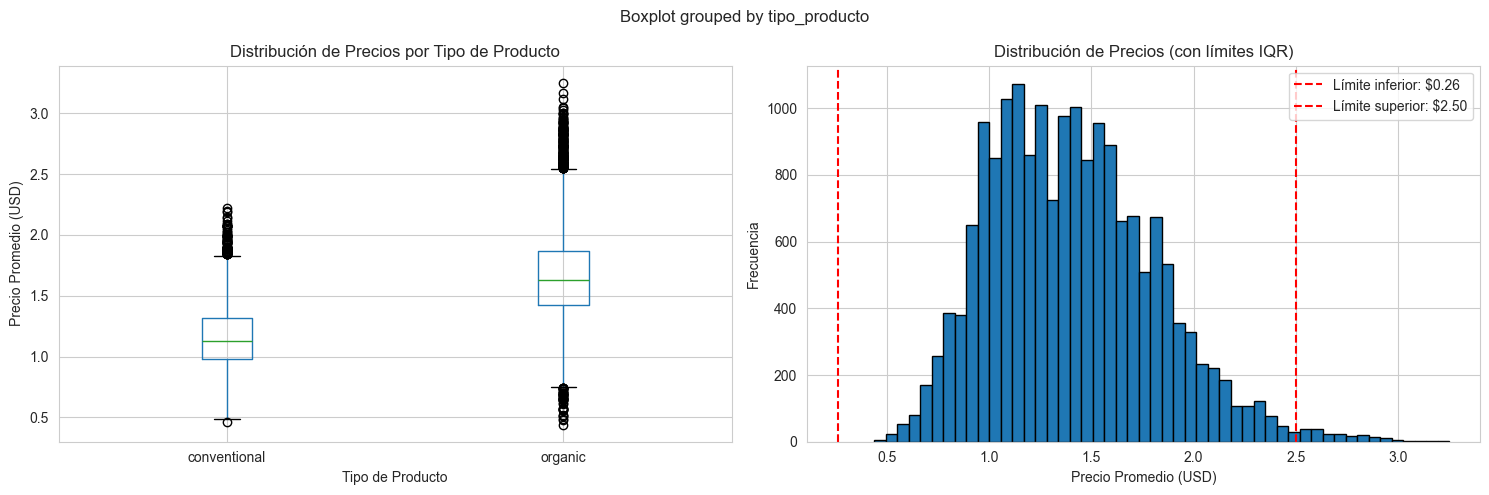

In [17]:
# 6.3 Visualización de outliers
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Boxplot por tipo de producto
data.boxplot(column='precio_promedio', by='tipo_producto', ax=axes[0])
axes[0].set_title('Distribución de Precios por Tipo de Producto')
axes[0].set_xlabel('Tipo de Producto')
axes[0].set_ylabel('Precio Promedio (USD)')

# Histograma
axes[1].hist(data['precio_promedio'], bins=50, edgecolor='black')
axes[1].axvline(li_precio, color='red', linestyle='--', label=f'Límite inferior: ${li_precio:.2f}')
axes[1].axvline(ls_precio, color='red', linestyle='--', label=f'Límite superior: ${ls_precio:.2f}')
axes[1].set_title('Distribución de Precios (con límites IQR)')
axes[1].set_xlabel('Precio Promedio (USD)')
axes[1].set_ylabel('Frecuencia')
axes[1].legend()

plt.tight_layout()
plt.show()

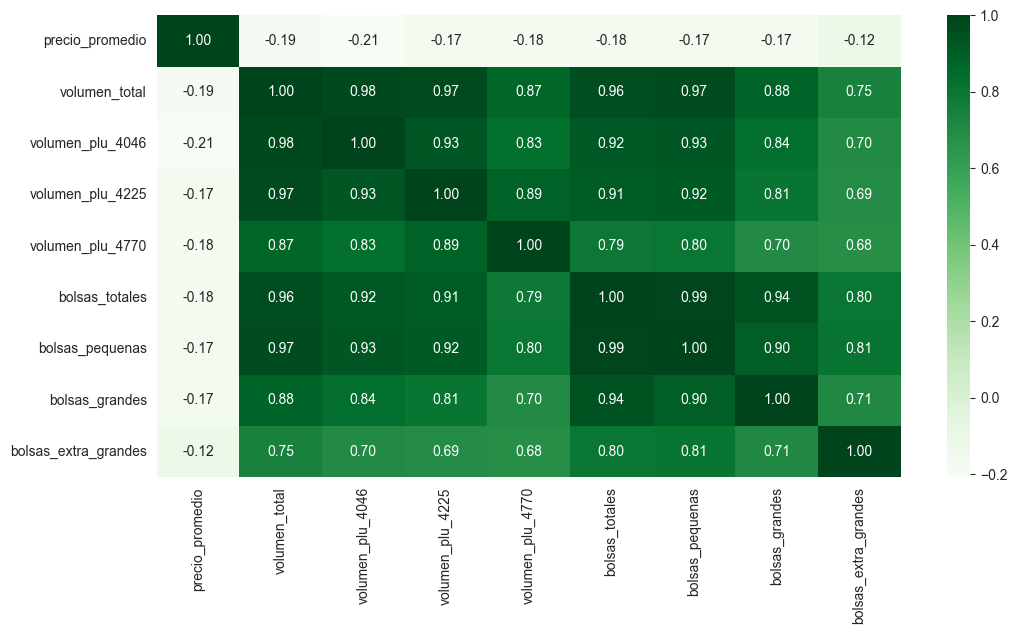

In [18]:
# 6.4 Visualización de correlacion 
columnas_analisis = [
    'precio_promedio',
    'volumen_total',
    'volumen_plu_4046',
    'volumen_plu_4225',
    'volumen_plu_4770',
    'bolsas_totales',
    'bolsas_pequenas',
    'bolsas_grandes',
    'bolsas_extra_grandes'
]

df_corr = data[columnas_analisis].corr()

sns.heatmap(
    df_corr,
    annot=True,
    fmt=".2f",
    cmap="Greens"
)

plt.show()

## 7️⃣ FILTRADO DE REGIONES 

**Objetivo:** Separar regiones identificadas con problemas

In [19]:
# 7.1 Identificar regiones con problemas

print("IDENTIFICACIÓN DE REGIONES AGREGADAS\n")
regiones_todas = data['region'].unique()
print(f"Total de regiones: {len(regiones_todas)}")
# Lista oficial de regiones problemáticas identificadas
regiones_problema = [
    'TotalUS',
    'WestTexNewMexico'
]
# Detectar solo las problemáticas reales
regiones_agregadas = [
    r for r in regiones_todas
    if r in regiones_problema
]

print(f"REGIONES CON PROBLEMAS ({len(regiones_agregadas)}):")
for r in sorted(regiones_agregadas):
    count = (data['region'] == r).sum()
    print(f"   - {r:<25} ({count:,} registros)")

# Regiones válidas
regiones_validas = [
    r for r in regiones_todas
    if r not in regiones_problema
]
print(f"REGIONES VÁLIDAS: {len(regiones_validas)}")

IDENTIFICACIÓN DE REGIONES AGREGADAS

Total de regiones: 54
REGIONES CON PROBLEMAS (2):
   - TotalUS                   (338 registros)
   - WestTexNewMexico          (335 registros)
REGIONES VÁLIDAS: 52


In [20]:
# 7.2 Filtrar regiones agregadas
print("FILTRANDO REGIONES ...")

registros_antes = len(data)

# Crear dataset solo con regiones individuales
data_limpio = data[~data['region'].isin(regiones_agregadas)].copy()

registros_despues = len(data_limpio)
registros_eliminados = registros_antes - registros_despues

print(f"Registros antes: {registros_antes:,}")
print(f"Registros después: {registros_despues:,}")
print(f"Registros filtrados: {registros_eliminados:,} ({registros_eliminados/registros_antes*100:.1f}%)")
print(f"Regiones agregadas filtradas exitosamente")
print(f"Regiones restantes: {data_limpio['region'].nunique()}")

FILTRANDO REGIONES ...
Registros antes: 18,249
Registros después: 17,576
Registros filtrados: 673 (3.7%)
Regiones agregadas filtradas exitosamente
Regiones restantes: 52


## 8️⃣ FEATURE ENGINEERING
**Objetivo:** Crear variables derivadas útiles para análisis

In [21]:
# 8.1 Variables categóricas derivadas
print("CREANDO VARIABLES CATEGÓRICAS...")

# Clasificación de precio
data_limpio['categoria_precio'] = pd.cut(
    data_limpio['precio_promedio'],
    bins=[0, 1.0, 1.5, 2.0, float('inf')],
    labels=['Bajo', 'Medio', 'Alto', 'Premium']
)

# Clasificación de volumen
data_limpio['categoria_volumen'] = pd.qcut(
    data_limpio['volumen_total'],
    q=4,
    labels=['Bajo', 'Medio-Bajo', 'Medio-Alto', 'Alto']
)



print("Variables categóricas creadas:")
print("   - categoria_precio (Bajo/Medio/Alto/Premium)")
print("   - categoria_volumen (Bajo/Medio-Bajo/Medio-Alto/Alto)")
print("DISTRIBUCIÓN DE CATEGORÍAS:")
print("Por Precio:")
print(data_limpio['categoria_precio'].value_counts())


CREANDO VARIABLES CATEGÓRICAS...
Variables categóricas creadas:
   - categoria_precio (Bajo/Medio/Alto/Premium)
   - categoria_volumen (Bajo/Medio-Bajo/Medio-Alto/Alto)
DISTRIBUCIÓN DE CATEGORÍAS:
Por Precio:
categoria_precio
Medio      8135
Alto       5330
Bajo       2751
Premium    1360
Name: count, dtype: int64


## 9️⃣ VALIDACIÓN FINAL Y EXPORTACIÓN
**Objetivo:** Verificar calidad final y exportar datos limpios

In [22]:
# 9.1 Resumen final
print("="*80)
print("RESUMEN FINAL DE LIMPIEZA DE DATOS")
print("="*80)

print(f"\n📊 DIMENSIONES:")
print(f"   Dataset original: {df_original.shape[0]:,} filas × {df_original.shape[1]} columnas")
print(f"   Dataset limpio:   {data_limpio.shape[0]:,} filas × {data_limpio.shape[1]} columnas")
print(f"   Retención:        {data_limpio.shape[0]/df_original.shape[0]*100:.1f}%")

print(f"\n❌ REGISTROS ELIMINADOS:")
print(f"   Total:            {df_original.shape[0] - data_limpio.shape[0]:,}")
print(f"   Porcentaje:       {(df_original.shape[0] - data_limpio.shape[0])/df_original.shape[0]*100:.1f}%")

print(f"\n✅ CALIDAD DE DATOS:")
print(f"   Valores nulos:    {data_limpio.isnull().sum().sum()}")
print(f"   Duplicados:       {data_limpio.duplicated().sum()}")
print(f"   Precios < 0:      {len(data_limpio[data_limpio['precio_promedio'] < 0])}")
print(f"   Volúmenes < 0:    {len(data_limpio[data_limpio['volumen_total'] < 0])}")

print(f"\n📅 RANGO TEMPORAL:")
print(f"   Desde:            {data_limpio['fecha'].min().date()}")
print(f"   Hasta:            {data_limpio['fecha'].max().date()}")
print(f"   Días totales:     {(data_limpio['fecha'].max() - data_limpio['fecha'].min()).days}")

print(f"\n🌍 COBERTURA GEOGRÁFICA:")
print(f"   Regiones únicas:  {data_limpio['region'].nunique()}")
print(f"   Tipos producto:   {data_limpio['tipo_producto'].unique()}")

print("\n" + "="*80)

RESUMEN FINAL DE LIMPIEZA DE DATOS

📊 DIMENSIONES:
   Dataset original: 18,249 filas × 14 columnas
   Dataset limpio:   17,576 filas × 18 columnas
   Retención:        96.3%

❌ REGISTROS ELIMINADOS:
   Total:            673
   Porcentaje:       3.7%

✅ CALIDAD DE DATOS:
   Valores nulos:    0
   Duplicados:       0
   Precios < 0:      0
   Volúmenes < 0:    0

📅 RANGO TEMPORAL:
   Desde:            2015-01-04
   Hasta:            2018-03-25
   Días totales:     1176

🌍 COBERTURA GEOGRÁFICA:
   Regiones únicas:  52
   Tipos producto:   ['conventional', 'organic']
Categories (2, object): ['conventional', 'organic']



In [23]:
# 9.2 Verificar tipos de datos finales
print("TIPOS DE DATOS FINALES:\n")
print(data_limpio.dtypes)

TIPOS DE DATOS FINALES:

fecha                   datetime64[ns]
precio_promedio                float64
volumen_total                  float64
volumen_plu_4046               float64
volumen_plu_4225               float64
volumen_plu_4770               float64
bolsas_totales                 float64
bolsas_pequenas                float64
bolsas_grandes                 float64
bolsas_extra_grandes           float64
tipo_producto                 category
anio                             int64
region                        category
suma_plu                       float64
volumen_esperado               float64
diferencia_volumen             float64
categoria_precio              category
categoria_volumen             category
dtype: object


In [24]:
# 9.3 Estadísticas descriptivas finales
print("ESTADÍSTICAS DESCRIPTIVAS FINALES:")
display(data_limpio[['precio_promedio', 'volumen_total', 'bolsas_totales']].describe().T)

ESTADÍSTICAS DESCRIPTIVAS FINALES:


,count,mean,std,min,25%,50%,75%,max
precio_promedio,17576.0,1.410401,4.017781e-01,0.44,1.1100,1.37,1.6700,3.25
volumen_total,17576.0,541314.324751,1.234431e+06,84.56,10480.9500,100139.85,387786.1150,11274749.11
bolsas_totales,17576.0,153577.520648,3.676340e+05,0.00,4865.3225,37539.17,102116.4375,4145406.70


In [25]:
# 9.4 Exportar dataset limpio en múltiples formatos
print("EXPORTANDO DATASET LIMPIO...")

# Eliminar columnas innecesarias y auxiliares antes de exportar
columnas_export = data_limpio.drop(columns=[
    'anio','suma_plu', 'volumen_esperado', 'diferencia_volumen',
], errors='ignore')

# CSV (formato universal)
columnas_export.to_csv('aguacates_limpio.csv', index=False, encoding='utf-8')
print("aguacates_limpio.csv")


# JSON (para APIs)
columnas_export.to_json(
    'aguacates_limpio.json',
    orient='records',
    date_format='iso',
    force_ascii=False,
    indent=2
)
print("aguacates_limpio.json")



EXPORTANDO DATASET LIMPIO...
aguacates_limpio.csv
aguacates_limpio.json




### Resumen de limpieza:
- ✅ Dataset original explorado completamente
- ✅ Estructura limpiada (nombres, tipos de datos)
- ✅ Integridad de negocio validada
- ✅ Duplicados eliminados
- ✅ Valores nulos manejados
- ✅ Outliers detectados (pero NO eliminados se conservaron)
- ✅ Regiones agregadas filtradas
- ✅ Variables derivadas creadas
- ✅ Dataset exportado en múltiples formatos


---